In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a78aef3c21441b603da189739a03963


In [17]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | buqayq
City not found. Skipping...
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | zhigansk
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | reconquista
Processing Record 11 of Set 1 | liverpool
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | bilma
Processing Record 14 of Set 1 | kannangad
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mamlyutka
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | satitoa
City not found. Skipping.

Processing Record 36 of Set 4 | kupang
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | ancud
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | kasongo-lunda
Processing Record 41 of Set 4 | menongue
Processing Record 42 of Set 4 | kars
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | comodoro rivadavia
Processing Record 45 of Set 4 | guhagar
Processing Record 46 of Set 4 | katsuura
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | palenque
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | ayan
Processing Record 5 of Set 5 | jalu
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | namatanai
Processing Record 8 of Set 5 | maloshuyka
City not found. Skipping...
Processing Record 9 of Set 5 | chip

Processing Record 26 of Set 8 | taksimo
Processing Record 27 of Set 8 | bandar-e torkaman
City not found. Skipping...
Processing Record 28 of Set 8 | yanam
Processing Record 29 of Set 8 | shihezi
Processing Record 30 of Set 8 | altay
Processing Record 31 of Set 8 | eichstatt
Processing Record 32 of Set 8 | jacqueville
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | najran
Processing Record 36 of Set 8 | shemordan
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | zaliznychne
Processing Record 39 of Set 8 | leh
Processing Record 40 of Set 8 | bargal
City not found. Skipping...
Processing Record 41 of Set 8 | vetluzhskiy
Processing Record 42 of Set 8 | blythe
Processing Record 43 of Set 8 | jurm
Processing Record 44 of Set 8 | yeppoon
Processing Record 45 of Set 8 | naze
Processing Record 46 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 47 of Set 8 | hirara
Processing Record 48

Processing Record 14 of Set 12 | morro bay
Processing Record 15 of Set 12 | lolua
City not found. Skipping...
Processing Record 16 of Set 12 | la ronge
Processing Record 17 of Set 12 | wad rawah
Processing Record 18 of Set 12 | puerto del rosario
Processing Record 19 of Set 12 | burica
City not found. Skipping...
Processing Record 20 of Set 12 | alice
Processing Record 21 of Set 12 | godre
City not found. Skipping...
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | umm lajj
Processing Record 24 of Set 12 | savonlinna
Processing Record 25 of Set 12 | ahuimanu
Processing Record 26 of Set 12 | hay river
Processing Record 27 of Set 12 | sungaipenuh
Processing Record 28 of Set 12 | melville
Processing Record 29 of Set 12 | ji-parana
City not found. Skipping...
Processing Record 30 of Set 12 | jumla
Processing Record 31 of Set 12 | puerto baquerizo moreno
Processing Record 32 of Set 12 | moron
Processing Record 33 of Set 12 | rumoi
Processing Record 34 of Set 12 | pa

In [18]:
len(city_data)

561

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,71.28,86,70,3.24,BR,2021-10-03 06:39:20
1,Mataura,-46.1927,168.8643,49.48,84,100,3.18,NZ,2021-10-03 06:39:20
2,East London,-33.0153,27.9116,58.14,47,0,16.11,ZA,2021-10-03 06:35:09
3,Zhigansk,66.7697,123.3711,34.92,60,31,7.63,RU,2021-10-03 06:39:21
4,Rocha,-34.4833,-54.3333,49.35,87,99,5.70,UY,2021-10-03 06:39:22
5,Iqaluit,63.7506,-68.5145,28.13,93,1,3.44,CA,2021-10-03 06:39:22
6,Bluff,-46.6000,168.3333,49.80,79,100,13.98,NZ,2021-10-03 06:39:22
7,Qaanaaq,77.4840,-69.3632,31.19,95,100,13.76,GL,2021-10-03 06:39:23
8,Reconquista,-29.1500,-59.6500,63.12,73,94,17.90,AR,2021-10-03 06:39:23
9,Liverpool,53.4106,-2.9779,48.52,84,40,7.00,GB,2021-10-03 06:36:30


In [20]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]

In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()


today = time.strftime("%x")
today

'10/02/21'

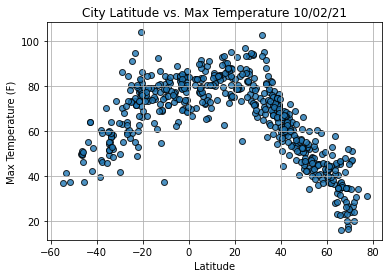

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

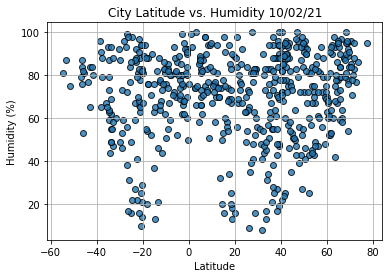

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


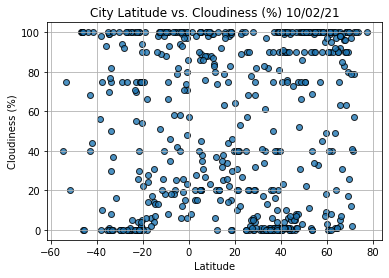

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

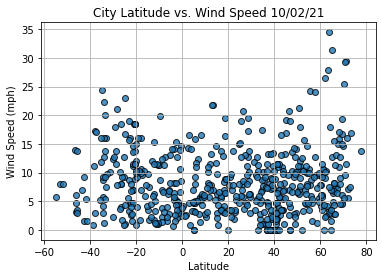

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

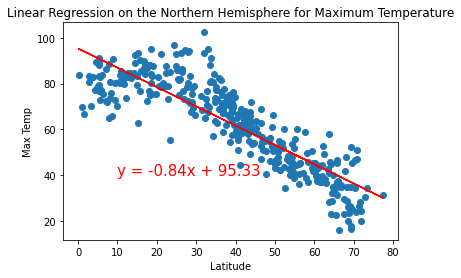

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

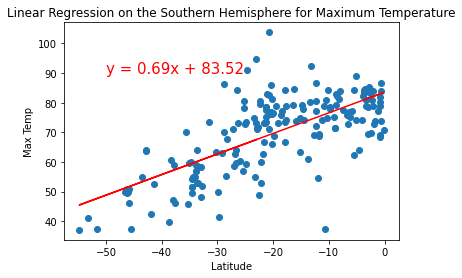

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

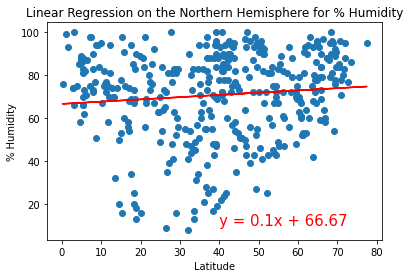

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

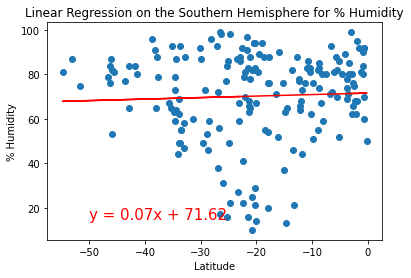

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

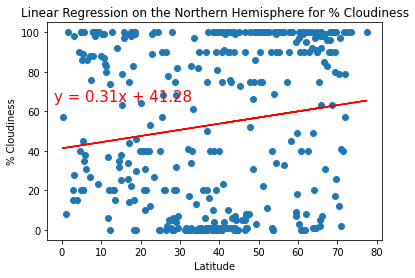

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-2,65))

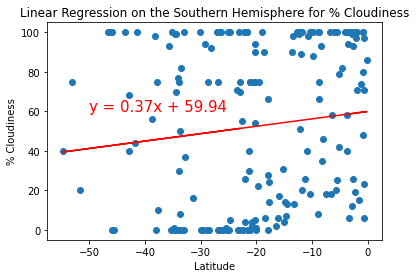

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

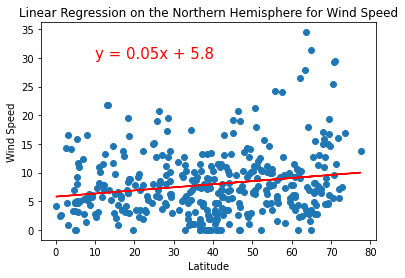

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))

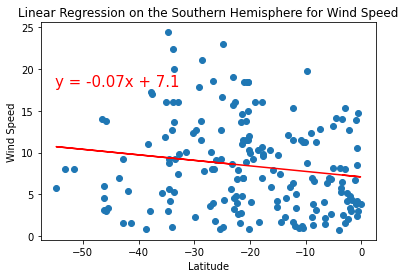

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,18))